# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        city_lng = city_weather['city']['coord']['lon']
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        city_humidity = city_weather['list'][0]['main']['humidity']
        city_clouds = city_weather['list'][0]['clouds']['all']
        city_wind = city_weather['list'][0]['wind']['speed']
        city_country = city_weather['city']['country']
        city_date = city_weather['list'][0]['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | les cayes
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 4 of Set 1 | mogi guacu
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | concepcion
Processing Record 13 of Set 1 | mikuni
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | gadzhiyevo
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | puerto ayora
City 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,24.91,72,0,3.13,MX,1682013600
1,arraial do cabo,-22.9661,-42.0278,25.92,65,0,8.16,BR,1682013600
2,papatowai,-46.5619,169.4708,11.77,85,100,1.45,NZ,1682013600
3,roma,43.2128,-75.4557,13.53,49,0,1.65,US,1682013600
4,nova sintra,14.8667,-24.7167,19.53,79,75,11.02,CV,1682013600


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,24.91,72,0,3.13,MX,1682013600
1,arraial do cabo,-22.9661,-42.0278,25.92,65,0,8.16,BR,1682013600
2,papatowai,-46.5619,169.4708,11.77,85,100,1.45,NZ,1682013600
3,roma,43.2128,-75.4557,13.53,49,0,1.65,US,1682013600
4,nova sintra,14.8667,-24.7167,19.53,79,75,11.02,CV,1682013600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

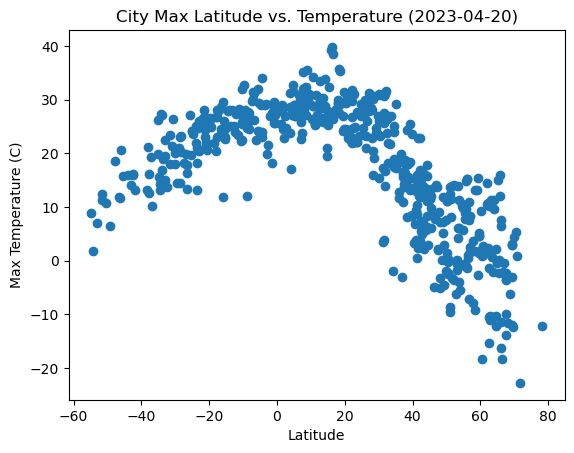

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-04-20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

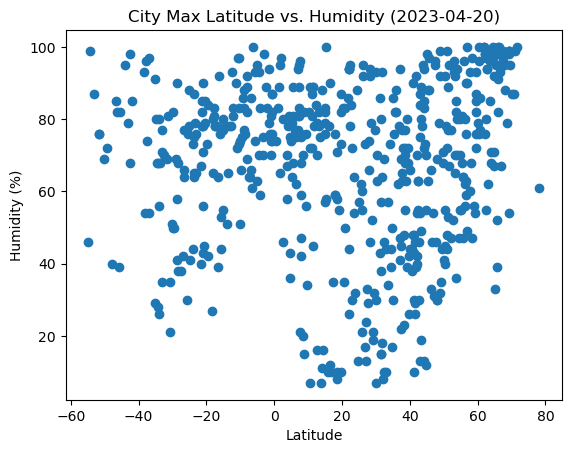

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2023-04-20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

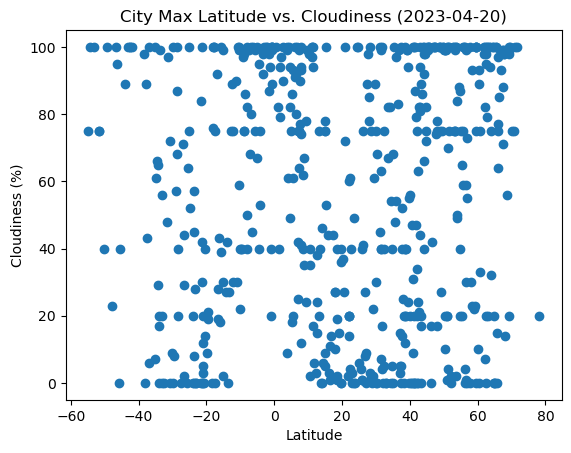

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-04-20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

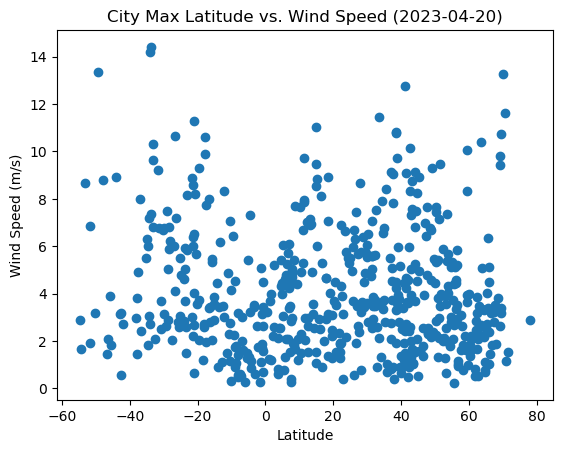

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-04-20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
def linReg(x,y):
    (slope, intercept, rvalue, pvalue, stdev) = linregress(x,y)
    regressValues = x*slope+intercept
    regressDict = {
                    'values':regressValues,
                    'slope':slope,
                    'intercept':intercept,
                    'rvalue':rvalue,
                    'pvalue':pvalue,
                    'stdev':stdev
    }
    return regressDict


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,24.91,72,0,3.13,MX,1682013600
3,roma,43.2128,-75.4557,13.53,49,0,1.65,US,1682013600
4,nova sintra,14.8667,-24.7167,19.53,79,75,11.02,CV,1682013600
7,hadibu,12.6500,54.0333,28.51,70,38,2.64,YE,1682013600
11,kodiak,57.7900,-152.4072,3.73,60,0,3.08,US,1682013600


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,25.92,65,0,8.16,BR,1682013600
2,papatowai,-46.5619,169.4708,11.77,85,100,1.45,NZ,1682013600
5,port-aux-francais,-49.3500,70.2167,6.37,72,100,13.36,TF,1682013600
6,paciran,-6.8767,112.3761,26.12,86,100,2.02,ID,1682013600
8,blackmans bay,-43.0167,147.3167,14.06,79,100,3.15,AU,1682013600


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8488845538684611


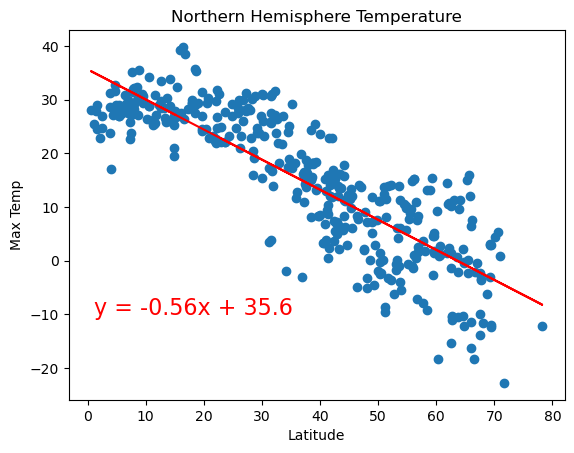

In [55]:
# Linear regression on Northern Hemisphere
north_temp_x = northern_hemi_df['Lat']
north_temp_y = northern_hemi_df['Max Temp']

north_temp_reg = linReg(north_temp_x, north_temp_y)

plt.scatter(x=north_temp_x,y=north_temp_y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Temperature')

plt.plot(north_temp_x, north_temp_reg['values'], 'r-')
plt.annotate(f'y = {round(north_temp_reg["slope"], 2)}x + {round(north_temp_reg["intercept"],2)}', xy=(1,-10),color='red',size=16)

print(f'The r-value is {north_temp_reg["rvalue"]}')

The r-value is 0.7521529499151636


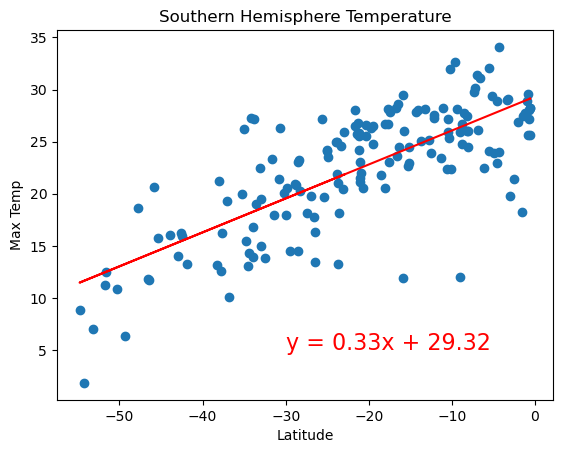

In [54]:
# Linear regression on Southern Hemisphere
south_temp_x = southern_hemi_df['Lat']
south_temp_y = southern_hemi_df['Max Temp']

south_temp_reg = linReg(south_temp_x, south_temp_y)

plt.scatter(x=south_temp_x,y=south_temp_y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Temperature')

plt.plot(south_temp_x, south_temp_reg['values'], 'r-')
plt.annotate(f'y = {round(south_temp_reg["slope"], 2)}x + {round(south_temp_reg["intercept"],2)}', xy=(-30,5),color='red',size=16)

print(f'The r-value is {south_temp_reg["rvalue"]}')

**Discussion about the linear relationship:** Both Northern and Souther Hemisphers have a strong correlation between Latitude and Temperature, although the correlation is less in the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2177442948883774


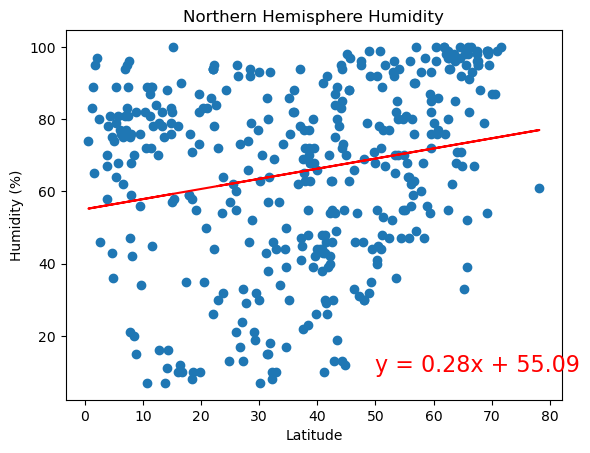

In [53]:
# Northern Hemisphere
north_hum_x = northern_hemi_df['Lat']
north_hum_y = northern_hemi_df['Humidity']

north_hum_reg = linReg(north_hum_x, north_hum_y)

plt.scatter(x=north_hum_x,y=north_hum_y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity')

plt.plot(north_hum_x, north_hum_reg['values'], 'r-')
plt.annotate(f'y = {round(north_hum_reg["slope"], 2)}x + {round(north_hum_reg["intercept"],2)}', xy=(50,10),color='red',size=16)

print(f'The r-value is {north_hum_reg["rvalue"]}')

The r-value is 0.20775749360145512


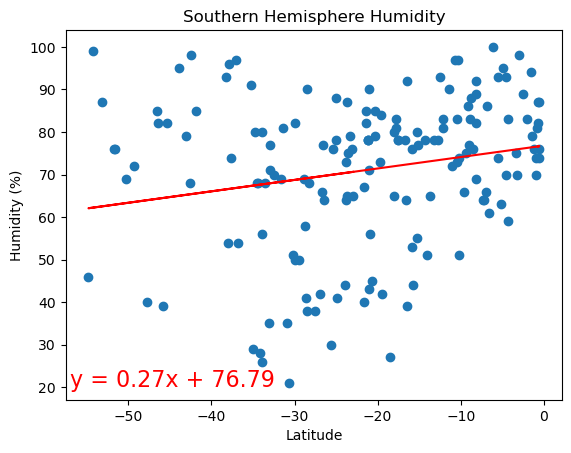

In [62]:
# Southern Hemisphere
south_hum_x = southern_hemi_df['Lat']
south_hum_y = southern_hemi_df['Humidity']

south_hum_reg = linReg(south_hum_x, south_hum_y)

plt.scatter(x=south_hum_x,y=south_hum_y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity')

plt.plot(south_hum_x, south_hum_reg['values'], 'r-')
plt.annotate(f'y = {round(south_hum_reg["slope"], 2)}x + {round(south_hum_reg["intercept"],2)}', xy=(-57,20),color='red',size=16)

print(f'The r-value is {south_hum_reg["rvalue"]}')

**Discussion about the linear relationship:** There is very litle correlation between Latitude and Humidity in either Hemisphere, although it is slightly higher in the Northern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.12993922837889046


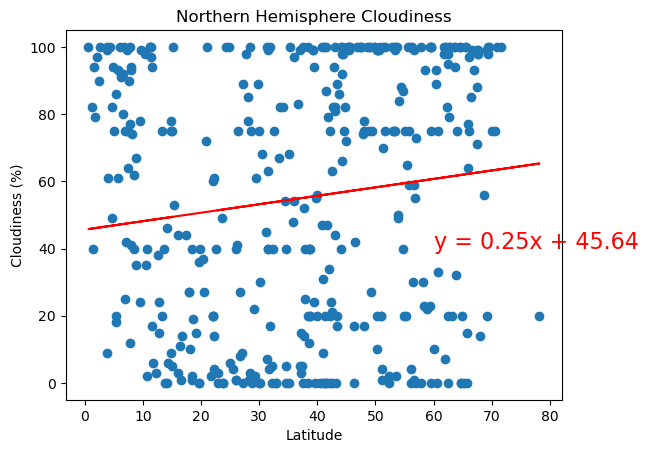

In [63]:
# Northern Hemisphere
north_cloud_x = northern_hemi_df['Lat']
north_cloud_y = northern_hemi_df['Cloudiness']

north_cloud_reg = linReg(north_cloud_x, north_cloud_y)

plt.scatter(x=north_cloud_x,y=north_cloud_y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness')

plt.plot(north_cloud_x, north_cloud_reg['values'], 'r-')
plt.annotate(f'y = {round(north_cloud_reg["slope"], 2)}x + {round(north_cloud_reg["intercept"],2)}', xy=(60,40),color='red',size=16)

print(f'The r-value is {north_cloud_reg["rvalue"]}')

The r-value is 0.15281299193183362


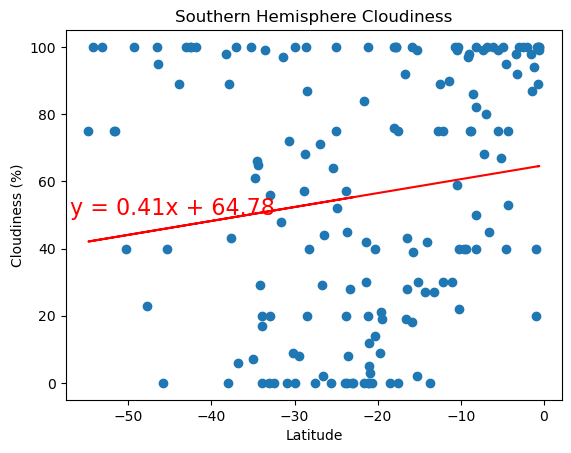

In [67]:
# Southern Hemisphere
south_cloud_x = southern_hemi_df['Lat']
south_cloud_y = southern_hemi_df['Cloudiness']

south_cloud_reg = linReg(south_cloud_x, south_cloud_y)

plt.scatter(x=south_cloud_x,y=south_cloud_y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness')

plt.plot(south_cloud_x, south_cloud_reg['values'], 'r-')
plt.annotate(f'y = {round(south_cloud_reg["slope"], 2)}x + {round(south_cloud_reg["intercept"],2)}', xy=(-57,50),color='red',size=16)

print(f'The r-value is {south_cloud_reg["rvalue"]}')

**Discussion about the linear relationship:** Latitude and Cloudiness seem to have an even smaller correlation than either of the previous examples.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.036124013831990445


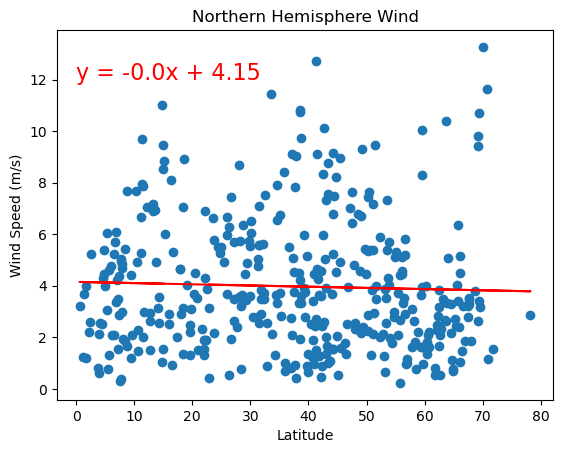

In [69]:
# Northern Hemisphere
north_wind_x = northern_hemi_df['Lat']
north_wind_y = northern_hemi_df['Wind Speed']

north_wind_reg = linReg(north_wind_x, north_wind_y)

plt.scatter(x=north_wind_x,y=north_wind_y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere Wind')

plt.plot(north_wind_x, north_wind_reg['values'], 'r-')
plt.annotate(f'y = {round(north_wind_reg["slope"], 2)}x + {round(north_wind_reg["intercept"],2)}', xy=(0,12),color='red',size=16)

print(f'The r-value is {north_wind_reg["rvalue"]}')

The r-value is -0.3314027240964722


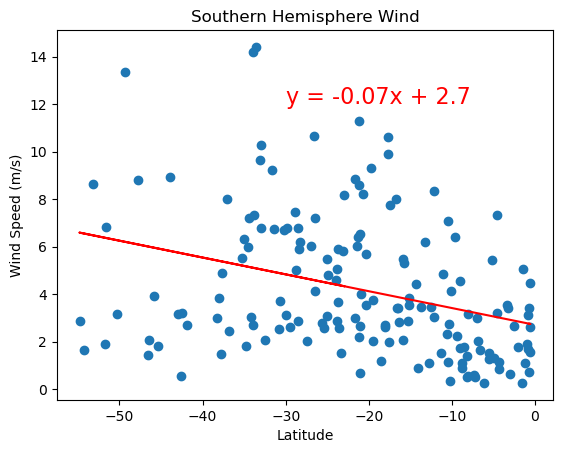

In [72]:
# Southern Hemisphere
south_wind_x = southern_hemi_df['Lat']
south_wind_y = southern_hemi_df['Wind Speed']

south_wind_reg = linReg(south_wind_x, south_wind_y)

plt.scatter(x=south_wind_x,y=south_wind_y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere Wind')

plt.plot(south_wind_x, south_wind_reg['values'], 'r-')
plt.annotate(f'y = {round(south_wind_reg["slope"], 2)}x + {round(south_wind_reg["intercept"],2)}', xy=(-30,12),color='red',size=16)

print(f'The r-value is {south_wind_reg["rvalue"]}')

**Discussion about the linear relationship:** The Northern Hemisphere shows very little correlation between Latitude and Wind Speed. The correlation is higher in the Southern Hemisphere, albeit still not particularly notable.